In [1]:
!gdown --id 1L7gRzRsyWzQ6jtRg86q81aVfKbREYv2A

Downloading...
From: https://drive.google.com/uc?id=1L7gRzRsyWzQ6jtRg86q81aVfKbREYv2A
To: /content/Dataset 2.csv
100% 999k/999k [00:00<00:00, 66.2MB/s]


In [2]:
import pandas as pd
import torch   

#handling text data
from torchtext.legacy import data  


In [3]:
dataset=pd.read_csv('/content/Dataset 1.csv',encoding='ISO-8859-1')
dataset

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [4]:
# import re
# def remove(text):
#     return re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)

In [5]:
# dataset['tweets'] = dataset['tweets'].apply(lambda x: remove(x))


In [6]:
dataset.drop(10313,inplace=True)

In [7]:
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.to_csv('data.csv',index=False)

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import Dense

In [9]:
voc_size=5000
import nltk
import re
from nltk.corpus import stopwords

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(dataset)):
    
    review = re.sub('[^a-zA-Z]', ' ', dataset['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [13]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [14]:
sent_length=40
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[2043  154  207 ...    0    0    0]
 [4120 4726 4463 ...    0    0    0]
 [4039  134 4311 ...    0    0    0]
 ...
 [ 583 2526 4437 ...    0    0    0]
 [3039 3895 3779 ...    0    0    0]
 [1531 4931 1354 ...    0    0    0]]


In [15]:
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# define model
model2 = Sequential()
model2.add(Embedding(voc_size,40,input_length=sent_length))
model2.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(filters=32, kernel_size=4, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(filters=32, kernel_size=1, activation='relu'))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
model2.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
print(model2.summary())
# compile network
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 40)            200000    
_________________________________________________________________
conv1d (Conv1D)              (None, 33, 32)            10272     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 13, 32)            4128      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6, 32)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 32)             1056      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 6, 32)             0

In [16]:
# ## Creating model
# embedding_vector_features=40
# model=Sequential()
# model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
# model.add(LSTM(32,return_sequences=True,input_shape=(3,1)))
# model.add(LSTM(16))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# print(model.summary())

In [18]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(dataset.label)

In [19]:
y_final

array([0, 0, 0, ..., 1, 0, 1])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2,random_state=42)

In [23]:
history=model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
129/129 [==============================] - 1s 9ms/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.0417 - val_accuracy: 0.9918
Epoch 2/10
129/129 [==============================] - 1s 8ms/step - loss: 0.0016 - accuracy: 0.9993 - val_loss: 0.0325 - val_accuracy: 0.9932
Epoch 3/10
129/129 [==============================] - 1s 8ms/step - loss: 9.6380e-04 - accuracy: 0.9992 - val_loss: 0.0363 - val_accuracy: 0.9932
Epoch 4/10
129/129 [==============================] - 1s 8ms/step - loss: 7.5628e-04 - accuracy: 0.9998 - val_loss: 0.0443 - val_accuracy: 0.9927
Epoch 5/10
129/129 [==============================] - 1s 8ms/step - loss: 7.3827e-04 - accuracy: 0.9996 - val_loss: 0.0445 - val_accuracy: 0.9927
Epoch 6/10
129/129 [==============================] - 1s 8ms/step - loss: 6.1709e-04 - accuracy: 0.9998 - val_loss: 0.0412 - val_accuracy: 0.9913
Epoch 7/10
129/129 [==============================] - 1s 8ms/step - loss: 6.6204e-04 - accuracy: 0.9998 - val_loss: 0.0526 - val_acc

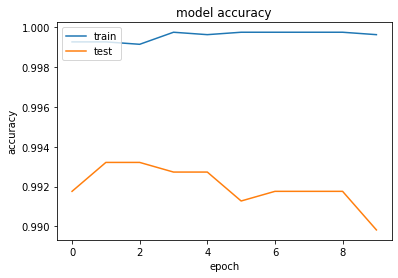

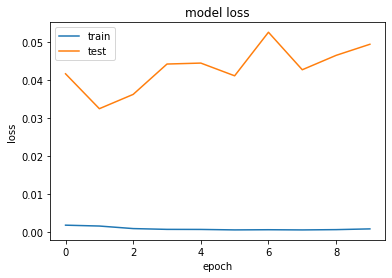

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[[1573    7]
 [  14  469]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1580
           1       0.99      0.97      0.98       483

    accuracy                           0.99      2063
   macro avg       0.99      0.98      0.99      2063
weighted avg       0.99      0.99      0.99      2063



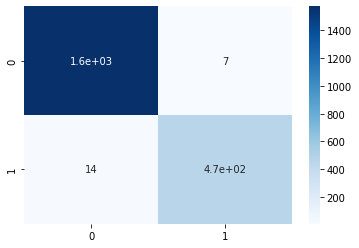

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred=model2.predict(X_test) 
y_pred = (y_pred > 0.5)

conf=confusion_matrix(y_test,y_pred)

print(conf)

import seaborn as sn


sn.heatmap(conf, cmap="Blues", annot=True)# font size
conf

evaluation=classification_report(y_test,y_pred)
print(evaluation)